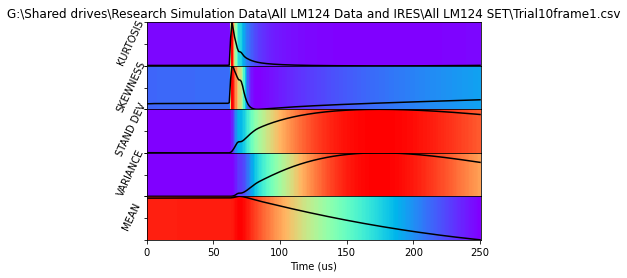

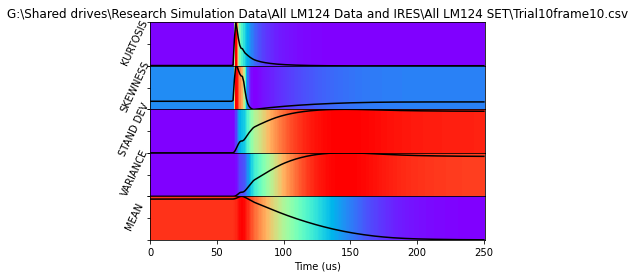

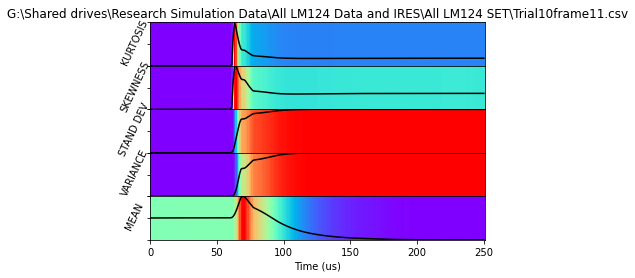

KeyboardInterrupt: 

In [10]:
import glob
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from ipywidgets import interactive
#import statistics as st
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn import preprocessing
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.fft import fft, fftfreq

def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):
    start = clearing_time_index + 1 - sub_window_size - 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        np.expand_dims(np.arange(max_time + 1, step=stride_size), 0) .T
    )
    
    Mean = np.mean(array[sub_windows,0], +1)
    M = np.array([Mean])
   # M_norm = np.linalg.norm(M)
   # M = M/M_norm
    Var = np.var(array[sub_windows,0], +1)
    V = np.array([Var])
    #V_norm = np.linalg.norm(V)
   # V = V/V_norm
    St_Dev = np.std(array[sub_windows,0], +1)
    SD = np.array([St_Dev])
   # SD_norm = np.linalg.norm(SD)
   # SD = SD/SD_norm
    Skew = skew(array[sub_windows,0], +1)
    S = np.array([Skew])
    #S_norm = np.linalg.norm(S)
   # S = S/S_norm
    Kur =  kurtosis(array[sub_windows,0], +1)
    K = np.array([Kur])
   # K_norm = np.linalg.norm(K)
   # K = K/K_norm
    m = np.concatenate([M, V, SD, S, K])
    for i in range (len(m)):
        offset = [min(m[i])] * len(m[i])
        m[i] = (m[i]-offset)
        norm = [max(m[i])]*len(m[i])
        m[i] = m[i]/norm
    m = m .T
    return  m

start_time = time.time()
filenames = sorted(glob.glob('G:\Shared drives\Research Simulation Data\All LM124 Data and IRES\All LM124 SET\Trial*.csv')) #change file name  
filenames = filenames[0:5]
for filename in filenames:
    #print(filename)
    df = pd.read_csv(filename,names=('Time', 'Amplitude'), usecols=[3, 4] )
    #cols = ["val", "time", "vout", "vin"]
    #df = pd.DataFrame(D,columns=cols)
    #max_val = max(df['Time'])
    #max_val = int(max_val)
    
    
    y = df[['Amplitude']]
   # print(y)
    #peaks, _ = find_peaks(df[['Amplitude']])
   # results_full = peak_widths(df[['Amplitude']], peaks, rel_height=1)
    #print(results_full)
    max_val = 200000
    df = df.drop(columns=['Time'])
    #print(df)
    df = df.to_numpy()
    sub_window_size = 200000 
    stride_size = 800
#def plotting (sub_window_size = 10000, stride_size = 1000): 
    b = vectorized_stride_v2(df, 0, max_val, sub_window_size, stride_size)
    #b = np.array(b)
    #print(b)
    cols = ['MEAN', 'VARIANCE', 'STANDARD DEV', 'SKEWNESS', 'KURTOSIS']
    dk = pd.DataFrame(b, columns=cols)
   # dk.plot(y=['MEAN'], color="black", legend=None)#, 'VARIANCE', 'STANDARD DEV', 'SKEWNESS', 'KURTOSIS'])
    #plt.pcolor(dk.T, cmap = 'rainbow')
    #plt.show()
    
    ###   work With FFT   ###

   # yf = fft(dk)
    #dk_2 = pd.DataFrame(yf, columns=cols)
    #print(dk_2)
    #plt.pcolor(np.abs(yf.T), cmap = 'rainbow')
    #xf = fftfreq(max_val, 1 / 40000)
    #plt.plot( np.abs(dk_2))
   # plt.show()
    
    
    
    #print(dk)
    #dk = dk.to_numpy()
    
    p_m = dk[['MEAN']]
    p_v = dk[['VARIANCE']]
    p_sd = dk[['STANDARD DEV']]
    p_s = dk[['SKEWNESS']]
    p_k = dk[['KURTOSIS']]
    
#ax.set_yticklabels([])
#ax.set_xticklabels([])
    #print(dk)
    #dk = dk.to_numpy()
    grid = dict(height_ratios=[1,1,1,1,1])
    fig,ax = plt.subplots(5,gridspec_kw=grid)
    cm = ax[0].pcolor(p_k.T, cmap = 'rainbow')
    ax[0].plot(p_k, color="black")
    ax[0].set_ylabel('KURTOSIS', rotation = 65)
    ax[0].set_yticklabels([])
    ax[0].set_xticklabels([])
    ax[1].pcolor(p_s.T, cmap = 'rainbow')
    ax[1].plot(p_s, color="black")
    ax[1].set_ylabel('SKEWNESS', rotation = 65)
    ax[1].set_yticklabels([])
    ax[1].set_xticklabels([])
    ax[2].pcolor(p_sd.T, cmap = 'rainbow')
    ax[2].plot(p_sd, color="black")
    ax[2].set_ylabel('STAND DEV', rotation = 65)
    ax[2].set_yticklabels([])
    ax[2].set_xticklabels([])
    ax[3].pcolor(p_v.T, cmap = 'rainbow')
    ax[3].plot(p_v, color="black")
    ax[3].set_ylabel('VARIANCE', rotation = 65)
    ax[3].set_yticklabels([])
    ax[3].set_xticklabels([])
    ax[4].pcolor(p_m.T, cmap = 'rainbow')
    ax[4].plot(p_m, color="black")
    ax[4].set_ylabel('MEAN', rotation = 65)
    ax[4].set_xlabel('Time (us)')
    ax[4].set_yticklabels([])
    
    fig.subplots_adjust(wspace=0, hspace=0)
   # ax[2][0].plot(y)
    #ax[1][0].plot(dk["MEAN"])
   # ax[2][0].margins(x=0)
    #ax[1][0].margins(x=0)
    #ax[1][0].pcolor(np.abs(yf.T), cmap = 'rainbow')
   # ax[2][0].plot(y)
    #ax[2][0].margins(x=0)
    #ax[1][1].axis('off')
    #ax[0][0].set_yticks(range(len(dk.columns)))
    #ax[0][0].set_yticklabels([])#dk.columns)
    ax[0].set_title(filename)
    #ax[0][1].set_yticks(range(len(dk_2.columns)))
    #plt.xticks(range(len(dk.index)), dk.index)
   # ax1.set_yticks(range(len(dk.columns)), dk.columns)
    #plt.figure(figsize=(5, 10))
    #plt.colorbar(cm,cax=ax[0][1],ax=ax[0][0])
    #plt.colorbar(cm,cax=ax[1][1],ax=ax[1][0])
    plt.show()
    
    ### 2nd type of graph
   # grid = dict(width_ratios=[30,1],height_ratios=[10,5])
   # fig,ax = plt.subplots(2,2,gridspec_kw=grid)
   # ax[0][0].plot(dk, color="black")
   # cm = ax[0][0].pcolor(dk.T, cmap = 'rainbow')
   # ax[2][0].plot(y)
   # ax[1][0].plot(dk)
   # ax[2][0].margins(x=0)
    #ax[1][0].margins(x=0)
    #ax[1][0].pcolor(np.abs(yf.T), cmap = 'rainbow')
   # ax[2][0].plot(y)
    #ax[2][0].margins(x=0)
    #ax[1][1].axis('off')
   # ax[0][0].set_yticks(range(len(dk.columns)))
    #ax[0][0].set_yticklabels(dk.columns)
    #ax[0][0].set_title(filename)
    #ax[0][1].set_yticks(range(len(dk_2.columns)))
    #plt.xticks(range(len(dk.index)), dk.index)
   # ax1.set_yticks(range(len(dk.columns)), dk.columns)
    #plt.figure(figsize=(5, 10))
   # plt.colorbar(cm,cax=ax[0][1],ax=ax[0][0])
    #plt.colorbar(cm,cax=ax[1][1],ax=ax[1][0])
    #plt.show()
    
    
    #interactive_plot = interactive (plotting, sub_window_size = (10,100000,100) , stride_size = (10,100000,100) )
    
    
    """  #IRES 2 TIME
    r = np.array(dk[['MEAN']])
    max_val = 200000
    sub_window_size = 200000
    stride_size = 1
    b = vectorized_stride_v2(r, 0, max_val, sub_window_size, stride_size)
    
    cols = ['MEAN', 'VARIANCE', 'STANDARD DEV', 'SKEWNESS', 'KURTOSIS']
    dk = pd.DataFrame(b, columns=cols)
    #m = dk['MEAN'].mean()
    #print(m-dk.mean())
    #print(dk.max())
    dk.plot(y=['MEAN', 'VARIANCE', 'STANDARD DEV', 'SKEWNESS', 'KURTOSIS'])
    #plt.pcolor(dk.T, cmap = 'rainbow')
    plt.show()
    
    ###   work With FFT   ###

   # yf = fft(dk)
    #dk_2 = pd.DataFrame(yf, columns=cols)
    #print(dk_2)
    #plt.pcolor(np.abs(yf.T), cmap = 'rainbow')
    #xf = fftfreq(max_val, 1 / 40000)
    #plt.plot( np.abs(dk_2))
   # plt.show()
    
    p_m = dk[['MEAN']]
    p_v = dk[['VARIANCE']]
    p_sd = dk[['STANDARD DEV']]
    p_s = dk[['SKEWNESS']]
    p_k = dk[['KURTOSIS']]
    
#ax.set_yticklabels([])
#ax.set_xticklabels([])
    #print(dk)
    #dk = dk.to_numpy()
    grid = dict(height_ratios=[1,1,1,1,1])
    fig,ax = plt.subplots(5,gridspec_kw=grid)
    cm = ax[0].pcolor(p_k.T, cmap = 'rainbow')
    ax[0].plot(p_k, color="black")
    ax[0].set_ylabel('KURTOSIS', rotation = 65)
    ax[0].set_yticklabels([])
    ax[0].set_xticklabels([])
    ax[1].pcolor(p_s.T, cmap = 'rainbow')
    ax[1].plot(p_s, color="black")
    ax[1].set_ylabel('SKEWNESS', rotation = 65)
    ax[1].set_yticklabels([])
    ax[1].set_xticklabels([])
    ax[2].pcolor(p_sd.T, cmap = 'rainbow')
    ax[2].plot(p_sd, color="black")
    ax[2].set_ylabel('STAND DEV', rotation = 65)
    ax[2].set_yticklabels([])
    ax[2].set_xticklabels([])
    ax[3].pcolor(p_v.T, cmap = 'rainbow')
    ax[3].plot(p_v, color="black")
    ax[3].set_ylabel('VARIANCE', rotation = 65)
    ax[3].set_yticklabels([])
    ax[3].set_xticklabels([])
    ax[4].pcolor(p_m.T, cmap = 'rainbow')
    ax[4].plot(p_m, color="black")
    ax[4].set_ylabel('MEAN', rotation = 65)
    ax[4].set_xlabel('Time (us)')
    ax[4].set_yticklabels([])
    
    fig.subplots_adjust(wspace=0, hspace=0)
   # ax[2][0].plot(y)
    #ax[1][0].plot(dk["MEAN"])
   # ax[2][0].margins(x=0)
    #ax[1][0].margins(x=0)
    #ax[1][0].pcolor(np.abs(yf.T), cmap = 'rainbow')
   # ax[2][0].plot(y)
    #ax[2][0].margins(x=0)
    #ax[1][1].axis('off')
    #ax[0][0].set_yticks(range(len(dk.columns)))
    #ax[0][0].set_yticklabels([])#dk.columns)
    ax[0].set_title('IRES_2_'+filename)
    #ax[0][1].set_yticks(range(len(dk_2.columns)))
    #plt.xticks(range(len(dk.index)), dk.index)
   # ax1.set_yticks(range(len(dk.columns)), dk.columns)
    #plt.figure(figsize=(5, 10))
    #plt.colorbar(cm,cax=ax[0][1],ax=ax[0][0])
    #plt.colorbar(cm,cax=ax[1][1],ax=ax[1][0])
    plt.show()
    #print (dk)
    print ("My program took", time.time() - start_time, "to run") """
#interactive_plot